## Исследование данных о российском кинопрокате



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


# Для подавления научной нотации (экспоненциального формата чисел) в столбце "box_office":
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('max_columns', None)

### 1. Чтение данных, объединение в общий датафрейм

In [2]:
movies_table = pd.read_csv('/code/datasets/mkrf_movies.csv')
display(movies_table.head(5))
movies_table.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
shows_table = pd.read_csv('/code/datasets/mkrf_shows.csv')
display(shows_table.head())
shows_table.info()

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


* Объединять будем по номеру прокатного удостоверения (столбец 'puNumber'). Тип данных *object* по столбцу 'puNumber' таблицы **movies_table** переведём в int. Присвоим переременной **mkrf_movies_show** получившийся датафрейм.

In [4]:
movies_table['puNumber'] = pd.to_numeric(movies_table['puNumber'],errors='coerce')
movies_table['puNumber'] = movies_table['puNumber'].fillna(0)
movies_table['puNumber'] = movies_table['puNumber'].astype('int')


mkrf_movies_show = movies_table.merge(shows_table, on='puNumber', how='left')
display(mkrf_movies_show.head())
print(mkrf_movies_show['puNumber'].isna().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


0


* Наименование `puNumber` приведем к змеиному регистру

In [5]:
mkrf_movies_show = mkrf_movies_show.rename(columns={'puNumber': 'pu_number'})

In [6]:
mkrf_movies_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [7]:
print(mkrf_movies_show['show_start_date'].min(), mkrf_movies_show['show_start_date'].max())

2010-01-11T12:00:00.000Z 2019-12-30T12:00:00.000Z


**Вывод:**

Объединенный датасет состоит из 7486 записей и 16 колонок, содержит данные  о прокатах фильмов за период с 11 января 2010 года по 30 декабря 2019г. на территории РФ.

### 2. Предобработка данных

#### 2.1. типы данных

строковые значения столбца 'show_start_date' преобразуем в тип **datetime**

строковые значения столбца 'ratings' преобразуем в тип **float**


In [8]:
mkrf_movies_show['show_start_date'] = pd.to_datetime(mkrf_movies_show['show_start_date'],format='%Y.%m.%dT%H:%M:%S')

mkrf_movies_show['ratings'] = pd.to_numeric(mkrf_movies_show['ratings'], errors='coerce')

#### 2.2. пропуски 


In [9]:
print('Пропуски в датафрейме:')
print(mkrf_movies_show.isna().sum())

Пропуски в датафрейме:
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64


In [10]:
display(mkrf_movies_show[pd.isna(mkrf_movies_show['director'])])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.000
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.900,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.700,"концерт,музыка",NaN


**Вывод**

Столбцы: film_studio, production_country, producer, financing_source не требуют заполнения пропусков, так как не участвуют в расчетах.

В колоннках refundable_support, nonrefundable_support, budget, financing_source по 7154 пропуска. Заполнение пропусков не требуется, так как присутствующие данные касаются фильмов отечественного производства.

director - 9 пропусков - не требуют удаления

ratings                   996

genres                    976

box_office               4328


#### 2.3. дубликаты 

Определим все уникальные значения в каждом столбце

In [11]:

for column in mkrf_movies_show:
    print(mkrf_movies_show[column].value_counts().head()) 
print('--------------------------------------------------------')
display('Явных дубликатов в таблице:', mkrf_movies_show.duplicated().sum())

День святого Валентина_                             5
Лузеры                                              4
Двойной копец                                       4
Не брать живым /По книге Раджива Чандрасекарана/    4
Кошки против собак: Месть Китти Галор               4
Name: title, dtype: int64
221054410    2
221154310    2
0            1
111008518    1
114002716    1
Name: pu_number, dtype: int64
2010-12-17 12:00:00+00:00    96
2014-12-01 12:00:00+00:00    71
2014-12-24 12:00:00+00:00    61
2016-06-07 12:00:00+00:00    41
2013-12-19 12:00:00+00:00    39
Name: show_start_date, dtype: int64
Художественный     4520
 Художественный    1389
Анимационный        828
Прочие              406
Документальный      288
Name: type, dtype: int64
Киностудия "Мосфильм"                     341
ООО "Мульт в кино"                         57
Анимаккорд Лтд                             23
ООО "Мульт в кино"                         18
ФГУП "ТПО "Киностудия "Союзмультфильм"     16
Name: film_studio, dtype: in

'Явных дубликатов в таблице:'

0

- *Особого внимания заслуживают столбцы 'title' и 'pu_number', так как значения в них являются уникальными и не являются категориальными.*


In [12]:
valentines_day  = mkrf_movies_show[mkrf_movies_show['title'] == 'День святого Валентина_']
duplicate = mkrf_movies_show[mkrf_movies_show['title'] == 'Там, где живут чудовища']

mkrf_movies_show['title'] = mkrf_movies_show['title'].str.strip('')
# print(saint_velenti n_duplicate)
display(valentines_day)
print('---------------------------------------------------------------------------------')
display(duplicate)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN


---------------------------------------------------------------------------------


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3855,"Там, где живут чудовища",221044110,2010-03-29 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.900,"фэнтези,драма,приключения",NaN
4717,"Там, где живут чудовища",221056610,2010-04-14 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.900,"фэнтези,драма,приключения",NaN
4807,"Там, где живут чудовища",221010011,2011-01-20 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.900,"фэнтези,драма,приключения",NaN
7143,"Там, где живут чудовища",121023319,2019-08-16 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Леджендари Пикчерз, Ви...","США, Германия",Спайк Джонз,"Том хэнкс, Винсент Лэндэй",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.900,"фэнтези,драма,приключения",NaN


In [13]:
dublicat_pu_number = mkrf_movies_show[mkrf_movies_show['pu_number'] == 221054410]
# print(dublicat_pu_number)
display(mkrf_movies_show[(mkrf_movies_show['pu_number'] == 221054410) | (mkrf_movies_show['pu_number'] == 221154310)])


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.000,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.400,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


***Вывод***

Явные дубликаты в датафрейме отсутствуют. 

Неявные дубликаты присутствуют в следующих столбцах:
- наименование фильма ( здесь их очень много( более по 60 названиям фильмов) максимальное количество и большая часть из них возникла в связи с наличем у них разных прокатных удостоверений ( возможно, устранить те дубликаты, дата страта котрых совпадает по годам и  известны суммы сборов)

- pu_number номер прокатного удостоверения( здесь их только два '221054410' и '221154310)

Избавляться от дубликатов нецелесообразно ввиду того, что сам факт выхода фильма в прокат является событием. А именно такие фильмы попадают в кинотеатры, что увеличивает кассовые сборы.  


#### 2.4. категориальные значения

In [14]:
# Удаляем все пробелы, которые встречаются в начале и в конце строки
print(mkrf_movies_show['type'].head(20))
mkrf_movies_show['type'] = mkrf_movies_show['type'].str.strip()
print(mkrf_movies_show['type'].value_counts())


0     Художественный
1     Художественный
2     Художественный
3     Художественный
4     Художественный
5     Художественный
6     Художественный
7     Художественный
8     Художественный
9     Художественный
10    Художественный
11    Художественный
12    Художественный
13    Художественный
14    Художественный
15    Художественный
16    Художественный
17    Художественный
18    Художественный
19    Художественный
Name: type, dtype: object
Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64


**Вывод**

Основная проблема- большое количество текста для описаний категорий, разделенного запятыми,точками, тире, ( в том числе списки строковых значений)

#### 2.5. количественные значения

Колонка 'budget' не может быть равна нулю, так как она уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.Сотоветственно, 'budget' >= 'nonrefundable_support' + 'refundable_support' 

In [15]:
mkrf_movies_show[mkrf_movies_show["budget"] == 0]


def sum_budget(nonrefundable_support, refundable_support, budget):
    if budget == 0:
        return nonrefundable_support + refundable_support
    else:
        return budget


mkrf_movies_show["budget"] = mkrf_movies_show.apply(
    lambda x: sum_budget(
        x["nonrefundable_support"], x["refundable_support"], x["budget"]
    ),
    axis=1,
)

mkrf_movies_show[mkrf_movies_show["budget"] == 0]


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [16]:
print(len(mkrf_movies_show [mkrf_movies_show['nonrefundable_support'] > 0]))
print(len(mkrf_movies_show [mkrf_movies_show['refundable_support'] > 0]))
print(len(mkrf_movies_show [mkrf_movies_show['budget'] > 0]))

323
111
332


#### 2.6. новые столбцы

* Создадим столбец с информацией о годе проката

In [17]:
mkrf_movies_show['show_start_year'] = mkrf_movies_show['show_start_date'].dt.year
mkrf_movies_show['show_start_year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: show_start_year, dtype: int64

- Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно. 

In [18]:
def create_column(elem):
    if elem and not isinstance(elem, float):
        return elem.split(",")[0]
    return np.nan


mkrf_movies_show["the_first_director"] = mkrf_movies_show.apply(
    lambda x: create_column(x["director"]), axis=1
)
mkrf_movies_show["first_genre"] = mkrf_movies_show.apply(
    lambda x: create_column(x["genres"]), axis=1
)


In [19]:
# для удобства расчетов создадим столбец 'box_office_mln'
mkrf_movies_show['box_office_mln'] = mkrf_movies_show['box_office'] / 1000000
display(mkrf_movies_show.sample(20, random_state=0))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,the_first_director,first_genre,box_office_mln
5137,Шакал,221073011,2011-06-01 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Мьючиал Филм Компани, Алфав...",США,Майкл Кэтон-Джонс,"Джеймс Джекс,Шон Дэниел,Майкл Кэтон-Джонс",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.800,детектив,NaN,2011,Майкл Кэтон-Джонс,детектив,NaN
6975,"Маша и Медведь. Серия ""Вокруг света за один час""",124003619,2019-05-31 12:00:00+00:00,Анимационный,Анимаккорд Лтд,Республика Кипр,Владислав Байрамгулов,"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Владислав Байрамгулов,NaN,NaN
39,"Автомобиль, скрипка и собака Клякса",111010313,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Р.Быков,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.200,"мюзикл,семейный",NaN,2013,Р.Быков,мюзикл,NaN
4920,Храбрые перцем,121006611,2011-04-22 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Стабер Продакшнз",США,Дэвид Гордон Грин,"Эндрю З.Дэвис, Скотт Стабер, Марк Хаффам",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.900,"фэнтези,комедия,приключения",NaN,2011,Дэвид Гордон Грин,фэнтези,NaN
2883,Чемодан.,111007116,2016-04-11 12:00:00+00:00,Художественный,А.Дамскер,Россия,А.Дамскер,А.Дамскер,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,А.Дамскер,NaN,NaN
3131,Кукла (2016),121001216,2016-01-14 12:00:00+00:00,Художественный,"Хуай Бразерс Пикчерз, Лэйкшор Интертейнмент, Э...",США,Уильям Брент Белл,"Мэтт Беренсон, Рой Ли, Гэри Лучези",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,66361446.230,2016,Уильям Брент Белл,NaN,66.361
1632,Королевы ринга,121020813,2013-07-29 12:00:00+00:00,Художественный,"Каре Продюксьон, Ля Пти Рьен, Оранж Студио, Эм...",Франция,Жан-Марк Рудницкий,"Фабрис Голдштейн, Тома Лангманн, Антуан Рейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.900,"комедия,спорт",NaN,2013,Жан-Марк Рудницкий,комедия,NaN
6314,"Домики (серии: ""Спасская башня"", ""Паром"", ""Кос...",114006418,2018-10-19 12:00:00+00:00,Анимационный,"Акционерное общество ""ТЕЛЕКОМПАНИЯ""",Россия,В.Азеев,"В.Сокологорский, Т.Цыварева, Н.Горшков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,В.Азеев,NaN,NaN
1035,Суши Гёл,121029112,2012-11-29 12:00:00+00:00,Художественный,Эссембли Лайн,США,Керн Секстон,NaN,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.600,"фантастика,боевик,приключения",NaN,2012,Керн Секстон,фантастика,NaN
4339,Перси Джексон и похититель молний,121001210,2010-01-26 12:00:00+00:00,Художественный,"1492 Пикчерз, Фокс 2000 Пикчерз, Импринт Интер...",США - Канада,Крис Коламбус,"Майкл Барнатан, Марк Морган, Томас М.Хэммел",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.200,"фэнтези,приключения,семейный",NaN,2010,Крис Коламбус,фэнтези,NaN


- Расчет доли государственной поддержки от общего бюджета фильма.

In [20]:
mkrf_movies_show["share_budget_support"] = (
    mkrf_movies_show["nonrefundable_support"] + mkrf_movies_show["refundable_support"]
) / mkrf_movies_show["budget"]

mkrf_movies_show["share_nonref_support"] = (
    mkrf_movies_show["nonrefundable_support"] / mkrf_movies_show["budget"]
)

mkrf_movies_show.replace([np.inf, -np.inf], np.nan)
mkrf_movies_show[mkrf_movies_show["budget"] > 0]


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,the_first_director,first_genre,box_office_mln,share_budget_support,share_nonref_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.100,"драма,мелодрама",365353.600,2013,А.Атанесян,драма,0.365,0.334,0.334
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,NaN,NaN,28140.000,2014,А.Якимчук,NaN,0.028,0.700,0.700
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.300,"комедия,фантастика",19957031.500,2013,Р.Давлетьяров,комедия,19.957,0.613,0.613
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.200,драма,55917.500,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.056,0.690,0.690
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.400,драма,232100.000,2014,М.Угаров,драма,0.232,0.625,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.000,400000000.000,980000000.000,Фонд кино,6.000,"история,биография,драма",717703185.530,2019,А.Кравчук,история,717.703,0.510,0.408
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.000,0.000,190000000.000,Фонд кино,6.700,"мультфильм,приключения,семейный",501069235.000,2019,Д.Шмидт,мультфильм,501.069,0.526,0.000
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.000,400000000.000,944000000.000,Фонд кино,5.700,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,NaN,0.530,0.424
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000,30000000.000,46154000.000,Министерство культуры,5.900,драма,NaN,2019,И.Северов,драма,NaN,0.650,0.650


In [21]:
display(mkrf_movies_show['share_nonref_support'].sort_values(ascending=False).head(10))
print(mkrf_movies_show['share_nonref_support'].mean())

3565   1.000
2874   1.000
2684   1.000
6323   1.000
2788   1.000
2058   1.000
2053   1.000
2472   0.875
5806   0.857
3047   0.729
Name: share_nonref_support, dtype: float64

0.4662537369545268


**Вывод**

Добавлены столбцы **share_budget_support** и  **share_nonref_support**
Первый описывает отношение суммы беспроцетного займа и субсидии к общему бюджету фильма
Второй отражает долю субсидий в общем бюджете фильма.

Господдержка, без учета возвратных займов, составляет 46,6 % от общего бюджета всей отечественной киноиндустрии.

### 3. Исследовательский анализ данных

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [22]:
count_titles_for_year = mkrf_movies_show.pivot_table(
    index='show_start_year',
    values=['title'],
    aggfunc=['count']
).sort_values(by='show_start_year', ascending=True)
count_titles_for_year

,count
,title
show_start_year,
2010,985
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505


In [23]:
count_titles_box_office = mkrf_movies_show.query(
    'box_office > 0'
).pivot_table(
    index='show_start_year',
    values=['title'],
    aggfunc=['count']
).sort_values(by='show_start_year', ascending=True)

# Избавляемся от мультииндекса 
count_titles_for_year.columns = ['_'.join(col).strip() for col in count_titles_for_year.columns.values]
count_titles_box_office.columns = ['_'.join(col).strip() for col in count_titles_box_office.columns.values]

# Переименование колонки
count_titles_box_office.rename(columns = {'count_title':'count_title_box_office'}, inplace = True)

share_counts_titles_box_office_title = count_titles_for_year.join(count_titles_box_office,how='left')
share_counts_titles_box_office_title['share_counts'] = share_counts_titles_box_office_title['count_title_box_office'] / share_counts_titles_box_office_title['count_title']
display(share_counts_titles_box_office_title)

,count_title,count_title_box_office,share_counts
show_start_year,,,
2010,985,101,0.103
2011,622,109,0.175
2012,593,123,0.207
2013,630,179,0.284
2014,807,273,0.338
2015,705,462,0.655
2016,818,525,0.642
2017,505,357,0.707
2018,891,475,0.533


**Вывод**

За 2010 - 2014 годы, информация неполная , о чем говорит доля фильмов с указанными сборами, соответственно, делать какой либо вывод здесь нереально. Что касается фильмов с 2015 по 2019, то здесь ситуация немногим лучше, однако даже для 2017 года отсутствие информации о прокате по почти 30 % фильмов, выглядят тоже ненадежно, кассовые сборы могут быть безнадежно низкими, но не нулевыми.    
     

count         3158.000
mean      76478696.161
std      240353122.823
min              0.000
25%          86239.000
50%        2327987.550
75%       23979671.025
max     3073568690.790
Name: box_office, dtype: float64

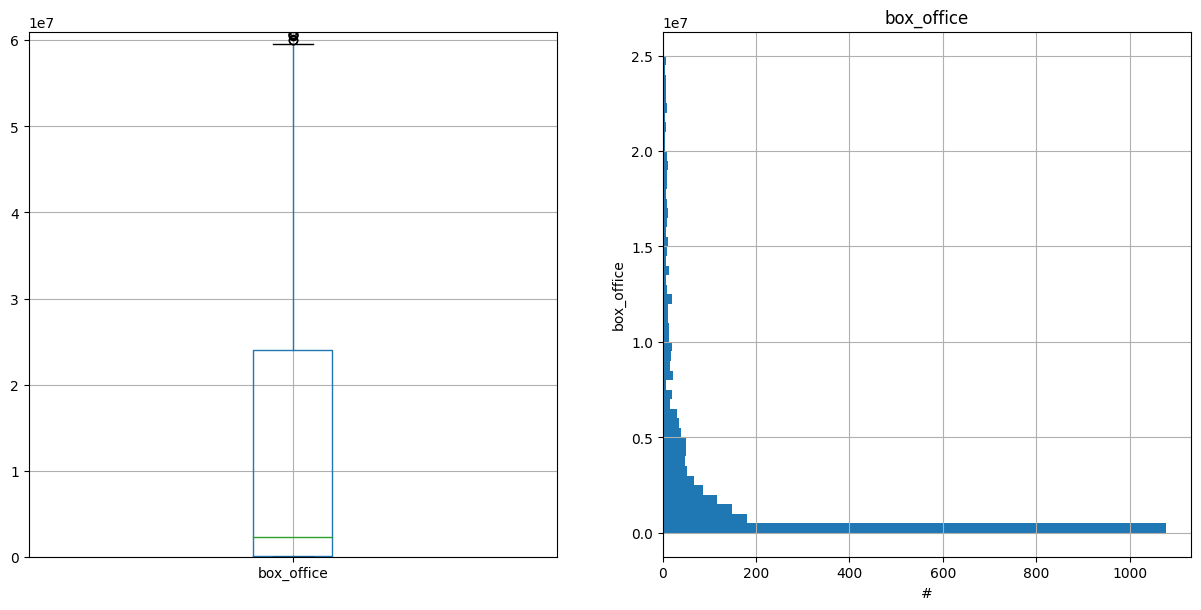

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
mkrf_movies_show.filter(items=['box_office']).boxplot()
plt.ylim(-10, 61000000)
plt.subplot(2,2,2)
plt.ylabel("box_office")
plt.xlabel("#")
plt.title("box_office")
mkrf_movies_show['box_office'].hist(range=(0,25000000), bins=50, orientation='horizontal')

mkrf_movies_show['box_office'].describe()

Типичные значения кассовых сборов расположились в диапазоне от 0 до 25 млн рублей. В выбросы попали суммы превышающие 60 млн рублей. Максимальное значение сборов - 3 073 568 690 рублей. Построим график зависимости типичных сумм сборов от возрастных ограничений:

<AxesSubplot: xlabel='age_restriction'>

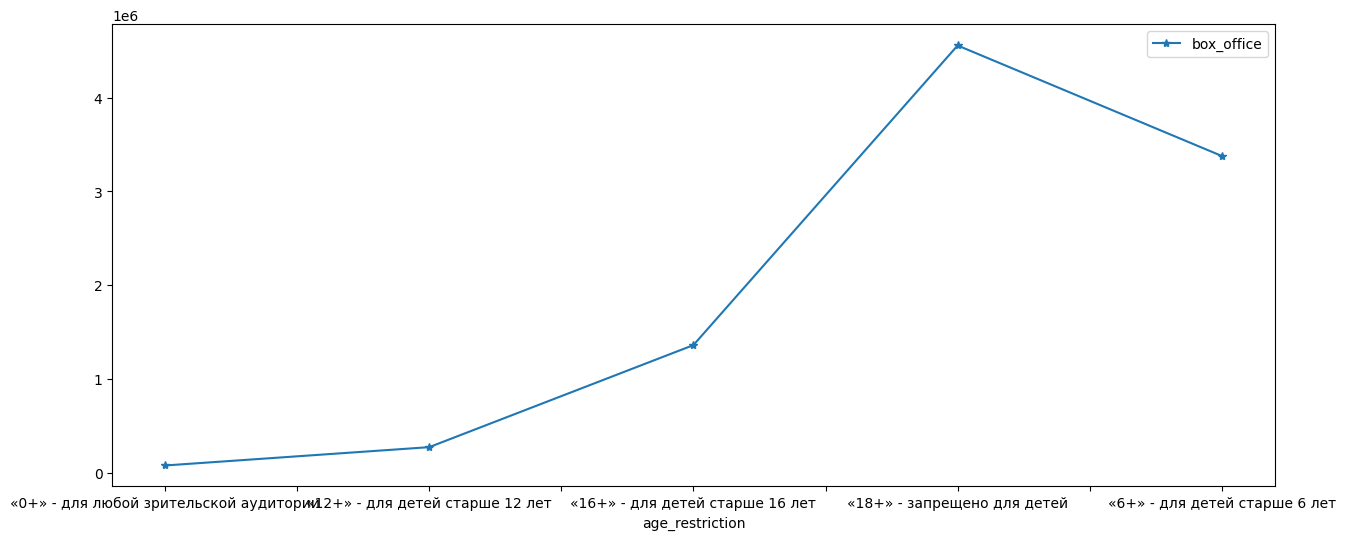

In [25]:
# display(mkrf_movies_show.groupby('show_start_year')['box_office_mln'])

(mkrf_movies_show.query(
'250000000 > box_office > 0'
)
 .groupby('age_restriction')['box_office'].median()
 .plot(x='age_restriction',y='box_office', figsize=(15, 6),style='-*',legend=True)
)

Судя по графику средние сборы у фильмов 18+ выше

* Динамика проката по годам. 

show_start_year
2017   9968340.000
2018   8891102.210
2015   4920933.000
2019   4627798.345
2016   3846679.410
2014     18160.000
2012      5660.000
2013      3522.500
2011      3000.000
2010      1700.000
Name: box_office, dtype: float64

<AxesSubplot: xlabel='show_start_year'>

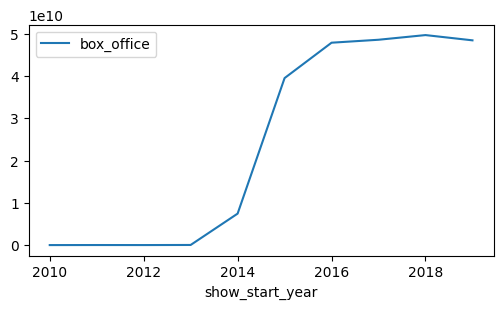

In [26]:
display(mkrf_movies_show.groupby('show_start_year')['box_office'].median().sort_values(ascending=False))

(mkrf_movies_show
     .groupby('show_start_year')['box_office'].sum()
     .plot(x='box_office',y='show_start_year',figsize=(6, 3),style='-',legend=True)
)

**Вывод**

График динамики отечественного кинопроката демонстрирует резкий подъем с 2013 года, с 2016 до 2018 - незначительный рост и снижение в 2018 году.

* Расчет средней и медианной сумм сборов для каждого года.

In [27]:
mean_median_fees_for_year = mkrf_movies_show.pivot_table(
    index='show_start_year',
    values=['box_office'],
    aggfunc=['mean', 'median']
).sort_values(by='show_start_year', ascending=True)
display(mean_median_fees_for_year)

,mean,median
,box_office,box_office
show_start_year,,
2010,23130.038,1700.000
2011,129383.165,3000.000
2012,54339.242,5660.000
2013,161954.925,3522.500
2014,26684415.266,18160.000
2015,84940570.315,4920933.000
2016,91000569.852,3846679.410
2017,136032793.326,9968340.000


* Влияние возрастного ограничения аудиторий на сборы фильма в прокате в период с 2015 по 2018

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot: xlabel='age_restriction'>

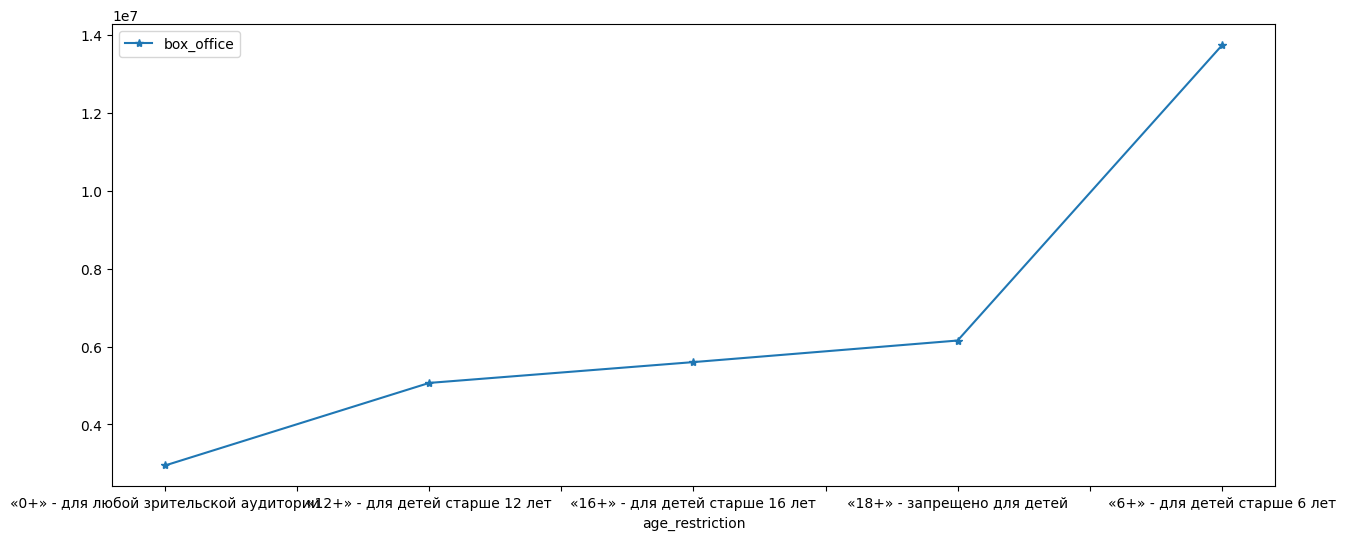

In [28]:
(mkrf_movies_show.query(
'2015 <= show_start_year <=2019'
)
 .groupby('age_restriction')['box_office'].median()
 .plot(x='age_restriction',y='box_office',figsize=(15, 6),style='-*',legend=True)
)

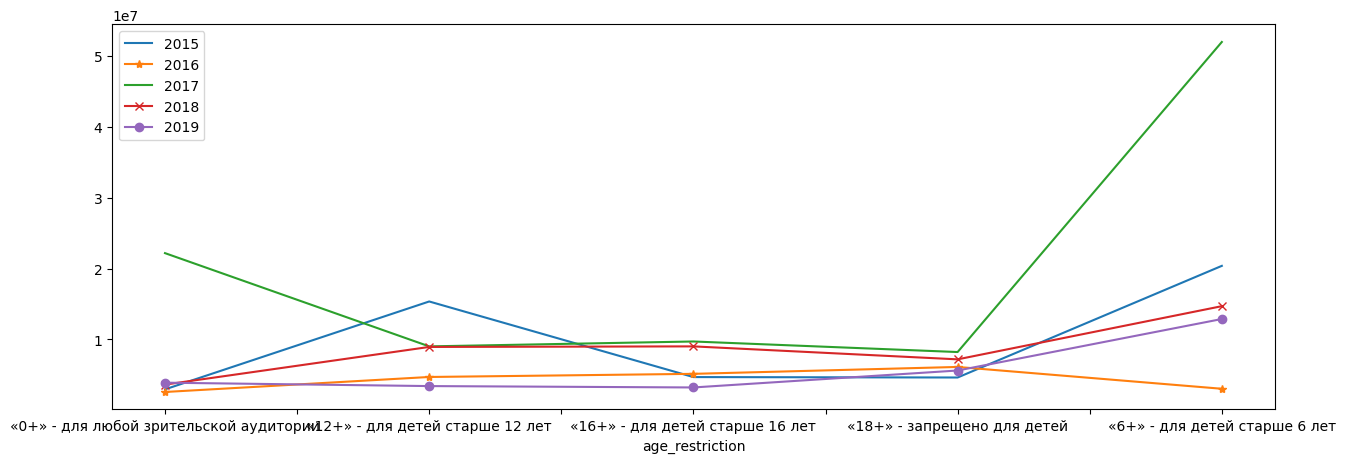

In [29]:
(mkrf_movies_show.query(
'show_start_year == 2015'
)
 .groupby('age_restriction')['box_office'].median()
 .plot(x='age_restriction',y='box_office',figsize=(15, 6),style='-',legend=True)
)
(mkrf_movies_show.query(
'show_start_year == 2016'
)
 .groupby('age_restriction')['box_office'].median()
 .plot(x='age_restriction',y='box_office',figsize=(15, 6),style='-*',legend=True)
)
(mkrf_movies_show.query(
'show_start_year == 2017'
)
 .groupby('age_restriction')['box_office'].median()
 .plot(x='age_restriction',y='box_office',figsize=(15, 6),style='-',legend=True)
)
(mkrf_movies_show.query(
'show_start_year == 2018'
)
 .groupby('age_restriction')['box_office'].median()
 .plot(x='age_restriction',y='box_office',figsize=(15, 6),style='-x',legend=True)
)
(mkrf_movies_show.query(
'show_start_year == 2019'
)
 .groupby('age_restriction')['box_office'].median()
 .plot(x='age_restriction',y='box_office',figsize=(15, 5),style='-o',legend=True)
)
plt.legend(["2015", "2016", "2017", "2018", "2019"])

In [30]:
display(mkrf_movies_show.groupby('age_restriction')['box_office'].sum().sort_values(ascending=False))
display(mkrf_movies_show.groupby('show_start_year')['box_office'].sum().sort_values(ascending=False))

age_restriction
«16+» - для детей старше 16 лет          76583674040.930
«12+» - для детей старше 12 лет          63225588059.830
«6+» - для детей старше 6 лет            57530728855.080
«18+» - запрещено для детей              42974727569.620
«0+» - для любой зрительской аудитории    1205003951.670
Name: box_office, dtype: float64

show_start_year
2018   49668403134.320
2017   48563707217.510
2019   48425708779.590
2016   47866299741.910
2015   39497365196.400
2014    7444951859.200
2013      29799706.200
2011      14102765.000
2012       6955423.000
2010       2428654.000
Name: box_office, dtype: float64

**Вывод**

В целом возрастное ограничение аудитории влияет на сборы фильма в прокате в период с 2015 по 2019 год. Так фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате. 

В зависимости от года медианное занчение сборов сильно не меняется, за исключением 2017 года. 
В 2017 году лидерами по сборам были фильмы в категории 6+ и 0+

### 4. Фильмы с государственной поддержкой

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [31]:
# Происвоим переменной 'budget_rf' срез по фильмам, получившим государственную поддержку 
budget_rf = mkrf_movies_show.query('budget > 0 and production_country == "Россия"')
display(budget_rf.head())

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,the_first_director,first_genre,box_office_mln,share_budget_support,share_nonref_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.100,"драма,мелодрама",365353.600,2013,А.Атанесян,драма,0.365,0.334,0.334
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,NaN,NaN,28140.000,2014,А.Якимчук,NaN,0.028,0.700,0.700
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.300,"комедия,фантастика",19957031.500,2013,Р.Давлетьяров,комедия,19.957,0.613,0.613
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.200,драма,55917.500,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.056,0.690,0.690
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.400,драма,232100.000,2014,М.Угаров,драма,0.232,0.625,0.625


#### Шаг 4.1. Изучение финансовых показателей

**Для визуализации общей динамики финансовых показателей по годам построим график сравнения.**

show_start_year
2019   9270928727.000
2016   7267140037.000
2015   7069257560.000
2017   7057172568.000
2018   6693938654.000
Name: budget, dtype: float64

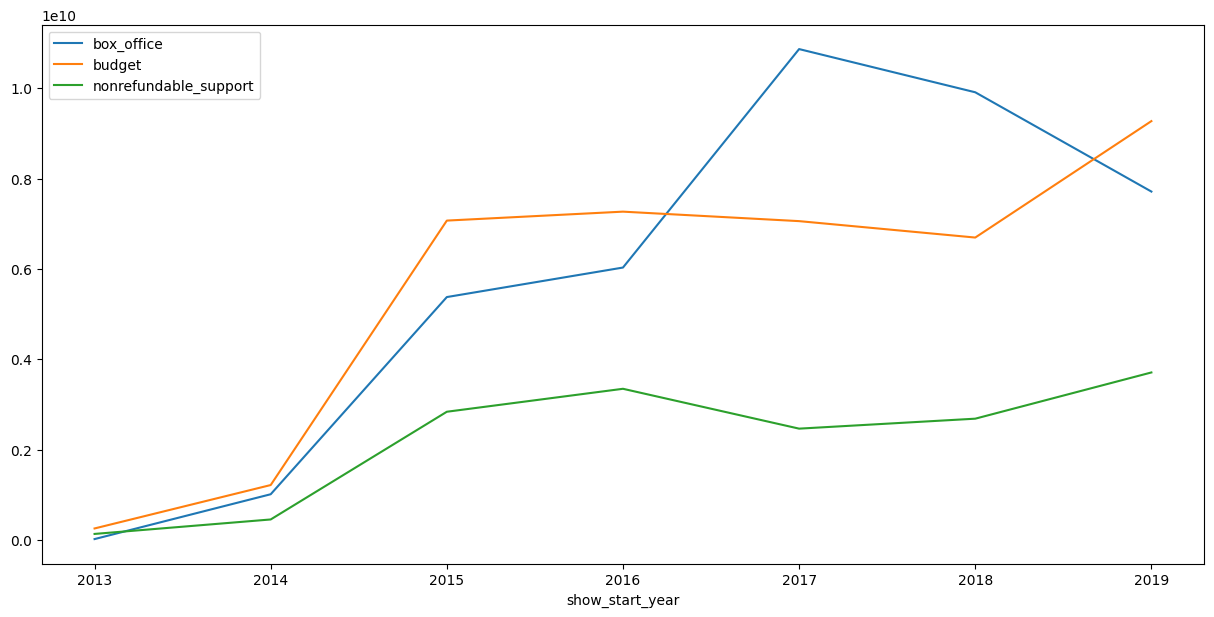

In [32]:
(budget_rf
    .groupby('show_start_year')['box_office'].sum()
    .plot(x='show_start_year',y='box_office',figsize=(15, 7),style='-',legend=True)
)

(budget_rf
    .groupby('show_start_year')['budget'].sum()
    .plot(x='show_start_year',y='budget',figsize=(15, 7),style='-',legend=True)
)

(budget_rf.groupby('show_start_year')['nonrefundable_support'].sum()
 .plot(x='show_start_year',y='nonrefundable_support',figsize=(15, 7),style='-',legend=True)
)

# Рассчет общего бюджета
display(budget_rf.groupby('show_start_year')['budget'].sum().sort_values(ascending=False).head())


С 2013 года наблюдается пропорциональный рост всех трёх показателей, причём до середины 2016 года бюджеты регулярно превышали кассовые сборы. 

С 2016 года тенденция поменятась, кассовые сборы стремительно росли до 2017 года и превышали общие расходы вплоть до 2018 года, при достаточно плавной динамике субсидий и общего бюджета. 

С наступлением 2018 года объём гос.поддержки увеличивался на ряду с общим бюджетом, тогда как кассовые сборы покатились вниз.

In [33]:
count_titles_for_year = budget_rf.pivot_table(
    index='show_start_year',
    values=['budget', 'nonrefundable_support', 'box_office'],
    aggfunc=['sum']
).sort_values(by='show_start_year', ascending=True
)
display(count_titles_for_year)

print(f'Общий объём сборов  {round(budget_rf["box_office"].sum() / 1000000000,2)} млрд.руб.')
print(f'Общий бюджет  {round(budget_rf["budget"].sum() / 1000000000,2)} млрд.руб.')
print(f'Общий объём невозвратных средств составил {round(budget_rf["nonrefundable_support"].sum() / 1000000000,2)} млрд.руб.')
print(f'Доля субсидий в общем бюджете  {round(budget_rf["nonrefundable_support"].sum() / budget_rf["budget"].sum() *100, 2)} %')

sum                                     
                     box_office         budget nonrefundable_support
show_start_year                                                     
2013               20322385.100  255435390.000         134347945.000
2014             1012690927.100 1216274716.000         454500000.000
2015             5376721000.930 7069257560.000        2838578340.000
2016             6030002853.100 7267140037.000        3346655482.000
2017            10865075300.960 7057172568.000        2464624781.000
2018             9909053917.990 6693938654.000        2684969465.000
2019             7711689662.090 9270928727.000        3708000000.000

Общий объём сборов  40.93 млрд.руб.
Общий бюджет  38.83 млрд.руб.
Общий объём невозвратных средств составил 15.63 млрд.руб.
Доля субсидий в общем бюджете  40.26 %


Начиная с 2014 государство значительно увеличило поддержку киноиндустрии.

type
Художественный   13988186548.000
Анимационный      1640489465.000
Документальный       3000000.000
Name: nonrefundable_support, dtype: float64

-----------------------------------------------


first_genre
драма        4359557452.000
комедия      2393782945.000
мультфильм   1531520000.000
фантастика   1216000000.000
история       820000000.000
Name: nonrefundable_support, dtype: float64

<AxesSubplot: ylabel='nonrefundable_support'>

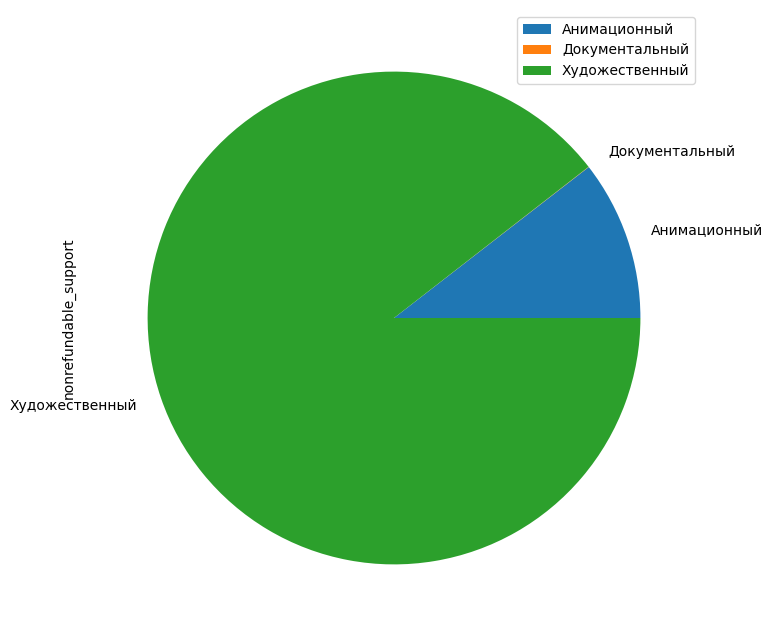

In [34]:
display(budget_rf.groupby('type')['nonrefundable_support'].sum().sort_values(ascending=False))
print('-----------------------------------------------')
display(budget_rf.groupby('first_genre')['nonrefundable_support'].sum().sort_values(ascending=False).head())

(budget_rf
    .groupby('type')['nonrefundable_support'].sum()
    .plot(kind='pie', figsize=(8,8), legend=True)
)

89 %  от объема невозвратной государтвенной поддержки  направляются на производство художественных фильмов. Документальные фильмы в аутсайдерах. 

Среди жанров лидируют драмы и комедии - наболее востребованые государством жанры, на них тратится больше всего бюджетных средств. Мультфильмы, фантастика,история занимают 3, 4 и 5 места соответсвенно.

In [35]:
# Жанры получившие больше всего субсидий.
gov_films = mkrf_movies_show.groupby('first_genre').agg({'budget':'sum'})
gov_films.sort_values(by='budget', ascending=False).head(10)

,budget
first_genre,
драма,11126886688.000
комедия,6150586880.000
мультфильм,5815499467.000
приключения,3374742189.000
фантастика,2443100815.000
фэнтези,2340123765.000
история,2145062206.000
триллер,1350960940.000
военный,1285906825.000


In [36]:
# Определим, фильмов какого жанра больше всего 
most_popular_genre = mkrf_movies_show.groupby('first_genre').agg({'title':'count'})
most_popular_genre.sort_values(by='title', ascending=False).head(10)


,title
first_genre,
драма,1688
комедия,697
боевик,617
ужасы,573
мультфильм,538
триллер,521
фантастика,410
мелодрама,383
фэнтези,358



<div class="alert alert-warning">
<h3>!! Комментарий ревьюера</h3>
    
Сумма это не самая хорошая метрика. Тут можно было посчитать отношение сборов к бюджету и для каждого года посмотреть на среднее такое соотношение. Таким образом можно найти самый окупившийся и неокупившийся фильм и в целом понять, окупаются в среднем фильмы или нет.

Также можно было сравнить рейтинги фильмов с поддержкой с рейтингами фильмов без поддержки
    
    
</div> 

* Рейтинг

In [37]:
budget_rf.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,the_first_director,first_genre,box_office_mln,share_budget_support,share_nonref_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.100,"драма,мелодрама",365353.600,2013,А.Атанесян,драма,0.365,0.334,0.334
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,NaN,NaN,28140.000,2014,А.Якимчук,NaN,0.028,0.700,0.700
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.300,"комедия,фантастика",19957031.500,2013,Р.Давлетьяров,комедия,19.957,0.613,0.613
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.200,драма,55917.500,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.056,0.690,0.690
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.400,драма,232100.000,2014,М.Угаров,драма,0.232,0.625,0.625


In [38]:
rate_gov_films = budget_rf.groupby('first_genre').agg(count=('title','count'),
                                                      sumsuport=('budget', 'sum'),
                                                      nonref_support =('nonrefundable_support', 'sum'),                  
                                                      mean_rate=('ratings', 'mean')).sort_values('count', ascending=False)
display(rate_gov_films)

,count,sumsuport,nonref_support,mean_rate
first_genre,,,,
драма,85,9631521375.000,4359557452.000,6.411
комедия,73,5985806880.000,2393782945.000,5.532
мультфильм,31,5815499467.000,1531520000.000,5.800
триллер,14,1239148553.000,609645285.000,5.671
мелодрама,14,832486346.000,345000000.000,5.936
фантастика,11,2443100815.000,1216000000.000,5.820
фэнтези,11,2340123765.000,799900000.000,6.091
ужасы,10,563877625.000,244000000.000,5.200
военный,8,998104114.000,347000866.000,6.425


### 5. Общий вывод:


Типичные значения кассовых сборов расположились в диапазоне от 0 до 25 млн рублей. В выбросы попали суммы превышающие 60 млн рублей. 

Отечественный кинопрокат начал резкий подъем с 2013 года и досиг плато в 2016.
В целом возрастное ограничение аудитории влияет на сборы фильма в прокате в период с 2015 по 2019 год. Так фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате.

В зависимости от года медианное значение сборов сильно не меняется, за исключением 2017 года. В 2017 году лидерами по сборам были фильмы в категории 6+ и 0+

**об отечественном кино**

89 % от объема невозвратной государтвенной поддержки направляются на производство художественных фильмов.

Среди жанров лидируют драмы и комедии - наболее востребованые государством жанры, на них тратится больше всего бюджетных средств. Мультфильмы, фантастика,история занимают 3, 4 и 5 места соответственно.

refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной
С 2013 года наблюдается пропорциональный рост всех трёх метрик, причём до середины 2016 года бюджеты регулярно превышали кассовые сборы. С 2016 года тенденция поменялась, кассовые сборы стремительно росли до 2017 года и превышали общие расходы вплоть до 2018 года, при достаточно плавной динамике субсидий и общего бюджета.
С наступлением 2018 года объём субсидирования увеличивался на ряду с общим бюджетом, в то время, как кассовые сборы покатились вниз.